### Smoke Detector Project

A smoke detector is a gadget that detects smoke and sounds an alarm to warn others. They are mainly found in offices, homes, and factories. Smoke detectors are classified into two types:

Photoelectric Smoke Detector - This sort of detector has an infrared, ultraviolet, and visible light source, as well as a sensor. It measures light intensity and triggers an alert if it falls below a certain threshold value, because light intensity diminishes in the presence of dust particles, smoke, and so on.

Ionization Smoke Detector - This sort of detector has an electronic circuit that monitors the current difference and sounds an alert if it is discovered to be greater than a certain threshold. Because the ions will be unable to travel freely owing to smoke and duct particles, the current in the circuit will drop.

Our goal is to create an AI model utilising the provided dataset that will correctly trigger an alert if smoke is detected. We will evaluate the accuracy of ten regression models and depict them in attractive graphs before selecting the best of them.

#### Feature Description

- UTC - The time when experiment was performed.
- Temperature - Temperature of Surroundings. Measured in Celsius
- Humidity - The air humidity during the experiment.
- TVOC - Total Volatile Organic Compounds. Measured in ppb (parts per billion)
- eCo2 - CO2 equivalent concentration. Measured in ppm (parts per million)
- Raw H2 - The amount of Raw Hydrogen present in the surroundings.
- Raw Ethanol - The amount of Raw Ethanol present in the surroundings.
- Pressure - Air pressure. Measured in hPa
- PM1.0 - Paticulate matter of diameter less than 1.0 micrometer .
- PM2.5 - Paticulate matter of diameter less than 2.5 micrometer.
- NC0.5 - Concentration of particulate matter of diameter less than 0.5 micrometers.
- NC1.0 - Concentration of particulate matter of diameter less than 1.0 micrometers.
- NC2.5 - Concentration of particulate matter of diameter less than 2.5 micrometers.
- CNT - Simple Count.
- Fire Alarm - (Reality) If fire was present then value is 1 else it is 0.

##### Import Libraries

In [714]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np
#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.calibration import calibration_curve
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import tabulate
from tabulate import tabulate
import time
from sklearn.datasets import  load_iris

In [715]:
data = pd.read_csv('smoke_detection_iot.csv', index_col = False)

In [716]:
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [717]:
data.tail()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [718]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [719]:
data.shape

(62630, 16)

In [720]:
data.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [721]:
data.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


#### Data Cleaning

In [722]:
#Delete Column 'Unnamed 0'
data.drop(columns=['Unnamed: 0'], inplace=True)

In [723]:
# Checking for missing values
data.isnull().sum().copy()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [724]:
# Checking for duplicates
data.duplicated().sum().copy()

0

In [725]:
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


#### Normalising the Dataset
Machine learning algorithms tend to perform better or converge faster when the different features (variables) are on a smaller scale. Therefore it is common practice to normalize the data before training machine learning models on it.Normalization also makes the training process less sensitive to the scale of the features. This results in getting better coefficients after training.

In [726]:
scaler = preprocessing.MinMaxScaler()
names = data.columns
d = scaler.fit_transform(data)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0.050600,0.512692,0.723239,0.0,0.0,0.522488,0.525685,0.986014,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,0.050603,0.512875,0.712535,0.0,0.0,0.534928,0.547185,0.987013,0.0,0.0,0.0,0.0,0.0,0.00004,0.0
2,0.050605,0.513046,0.701520,0.0,0.0,0.544179,0.565731,0.986347,0.0,0.0,0.0,0.0,0.0,0.00008,0.0
3,0.050607,0.513229,0.690971,0.0,0.0,0.549282,0.579682,0.986125,0.0,0.0,0.0,0.0,0.0,0.00012,0.0
4,0.050610,0.513412,0.681818,0.0,0.0,0.553429,0.591498,0.987013,0.0,0.0,0.0,0.0,0.0,0.00016,0.0


### Modelling

##### Import ML Algorithms and initialize them
In this process, ten (10) regression models are built and trained. They are:

- Random Forest Regressor
- Decision Tree Regressor
- Support Vector Regression
- Gradient Boosting Regressor. 
- KNeighbors Regressor
- Lasso Regression Model
- Ridge Regression Model
- Elastic Net Regressor
- Logistic Regression Model
- Linear Regression Model

First, we define a variable to store the model algorithm, next, we fit the train set variables into the model, and finally make some predictions in the test set.

In [727]:
#import and load libraries
import sklearn

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split

#### Select Target

In [728]:
y = scaled_df['Fire Alarm']

In [729]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Fire Alarm, dtype: float64

#### Select Feature
We are dropping 'Fire Alarm' column, since it is the target.

In [730]:
features = scaled_df.drop(["Fire Alarm"],axis=1)
features.shape

(62630, 14)

In [731]:
X = scaled_df[features.columns]

#### Train Test Split

In [732]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

#### Random Forest Regressor

In [733]:
RF_model = RandomForestRegressor()

In [734]:
#fit the model on the training data
RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [735]:
#predict on test data
preds_RF = RF_model.predict(X_test)

In [736]:
# Calculating the errors
mae_RF = mean_absolute_error(y_test,preds_RF)
mape_RF = mean_absolute_percentage_error(y_test,preds_RF)
rmse_RF = np.sqrt(mean_squared_error(y_test,preds_RF))

#### Gradient Boosting Regressor

In [737]:
GBR_model=GradientBoostingRegressor(n_estimators=100, max_depth=5,\
                                    min_samples_split=2,learning_rate=0.2)

In [738]:
GBR_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5)

In [739]:
preds_GBR=GBR_model.predict(X_test)

In [740]:
# Calculating the errors
mae_GBR = mean_absolute_error(y_test,preds_GBR)
mape_GBR = mean_absolute_percentage_error(y_test,preds_GBR)
rmse_GBR = np.sqrt(mean_squared_error(y_test,preds_GBR))

#### Support Vector Regression

In [741]:
SVR_model = SVR()

In [742]:
SVR_model.fit(X_train, y_train)

SVR()

In [743]:
preds_SVR = SVR_model.predict(X_test)

In [744]:
# Calculating the errors
mae_SVR = mean_absolute_error(y_test,preds_SVR)
mape_SVR = mean_absolute_percentage_error(y_test,preds_SVR)
rmse_SVR = np.sqrt(mean_squared_error(y_test,preds_SVR))

#### Decision Tree Regressor

In [745]:
DT_model = DecisionTreeRegressor()

In [746]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [747]:
preds_DT = DT_model.predict(X_test)

In [748]:
# Calculating the errors
mae_DT = mean_absolute_error(y_test,preds_DT)
mape_DT = mean_absolute_percentage_error(y_test,preds_DT)
rmse_DT = np.sqrt(mean_squared_error(y_test,preds_DT))

#### Linear Regression Model

In [749]:
LR_model = LinearRegression()

In [750]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [751]:
preds_LR = LR_model.predict(X_test)

In [752]:
# Calculating the errors
mae_LR = mean_absolute_error(y_test,preds_LR)
mape_LR = mean_absolute_percentage_error(y_test,preds_LR)
rmse_LR = np.sqrt(mean_squared_error(y_test,preds_LR))

#### K-Nearest Neighbor Regression

In [753]:
KNN_model = KNeighborsRegressor(n_neighbors=3)

In [754]:
KNN_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [755]:
preds_KNN = KNN_model.predict(X_test)

In [756]:
# Calculating the errors
mae_KNN = mean_absolute_error(y_test,preds_KNN)
mape_KNN = mean_absolute_percentage_error(y_test,preds_KNN)
rmse_KNN = np.sqrt(mean_squared_error(y_test,preds_KNN))

#### Lasso Regression Model

In [757]:
Lasso_model = Lasso(alpha=0.1)

In [758]:
Lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [759]:
preds_Lasso = Lasso_model.predict(X_test)

In [760]:
# Calculating the errors
mae_Lasso = mean_absolute_error(y_test,preds_Lasso)
mape_Lasso = mean_absolute_percentage_error(y_test,preds_Lasso)
rmse_Lasso = np.sqrt(mean_squared_error(y_test,preds_Lasso))

#### Ridge Regression Model

In [761]:
ridge_model = Ridge(alpha=1)

In [762]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [763]:
preds_ridge = ridge_model.predict(X_test)

In [764]:
# Calculating the errors
mae_ridge = mean_absolute_error(y_test,preds_ridge)
mape_ridge = mean_absolute_percentage_error(y_test,preds_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test,preds_ridge))

#### ELastic Net Regression Model

In [765]:
Elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

In [766]:
Elastic_model.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [767]:
preds_Elastic = Elastic_model.predict(X_test)

In [768]:
# Calculating the errors
mae_Elastic = mean_absolute_error(y_test,preds_Elastic)
mape_Elastic = mean_absolute_percentage_error(y_test,preds_Elastic)
rmse_Elastic = np.sqrt(mean_squared_error(y_test,preds_Elastic))

#### Logistic Regression Model

In [769]:
logreg_model = LogisticRegression()

In [770]:
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [771]:
preds_logreg = logreg_model.predict(X_test)

In [772]:
# Calculating the errors
mae_logreg = mean_absolute_error(y_test,preds_logreg)
mape_logreg = mean_absolute_percentage_error(y_test,preds_logreg)
rmse_logreg = np.sqrt(mean_squared_error(y_test,preds_logreg))

#### Evaluation of Models

In [773]:
ML_models = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'Gradient Boosting Regressor', 'Support Vector Regressor',\
              'Decision Tree Regressor', 'Linear Regressor', 'KNN Regressor', 'Lasso Regressor',\
             'Ridge Regressor', 'Elastic Net Regressor', 'Logistic Regressor'],
    'MAE': [mae_RF,mae_GBR,mae_SVR, mae_DT, mae_LR, mae_KNN, mae_Lasso, mae_ridge, mae_Elastic, mae_logreg],
    'MAPE': [mape_RF,mape_GBR,mape_SVR, mape_DT, mape_LR, mape_KNN, mape_Lasso, mape_ridge, mape_Elastic, mape_logreg],
    'RMSE': [rmse_RF,rmse_GBR,rmse_SVR, rmse_DT, rmse_DT, rmse_KNN, rmse_Lasso, rmse_ridge, rmse_Elastic, rmse_logreg]})
    
# sort by both MAE and RMSE
Best_Model = ML_models.sort_values(by=['MAE', 'RMSE'])
Best_Model = Best_Model.reset_index(drop=True)
Best_Model['Rank'] = Best_Model.index + 1

Best_Model_table = tabulate(Best_Model, headers='keys', tablefmt='grid', showindex=False)
print(Best_Model_table)

+-----------------------------+-------------+-------------+------------+--------+
| Model                       |         MAE |        MAPE |       RMSE |   Rank |
+=============================+=============+=============+============+========+
| Decision Tree Regressor     | 5.32226e-05 | 2.39693e+11 | 0.00729538 |      1 |
+-----------------------------+-------------+-------------+------------+--------+
| Random Forest Regressor     | 0.000139976 | 5.9444e+11  | 0.00650518 |      2 |
+-----------------------------+-------------+-------------+------------+--------+
| KNN Regressor               | 0.000230631 | 9.58774e+11 | 0.0111439  |      3 |
+-----------------------------+-------------+-------------+------------+--------+
| Gradient Boosting Regressor | 0.000295753 | 9.82602e+11 | 0.00510343 |      4 |
+-----------------------------+-------------+-------------+------------+--------+
| Logistic Regressor          | 0.0340093   | 4.19463e+13 | 0.184416   |      5 |
+---------------

##### Pie chart to display the proportion of Model Ranks

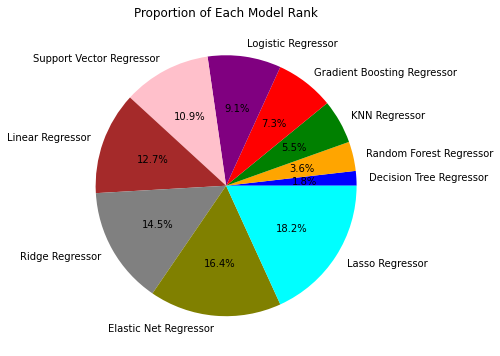

In [774]:
plt.figure(figsize=(8, 6))
ranks = Best_Model['Rank']
labels = Best_Model['Model']
plt.pie(ranks, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Proportion of Each Model Rank')
plt.show()

##### Bar plot to display the Mean Absolute Values of each Regression Model

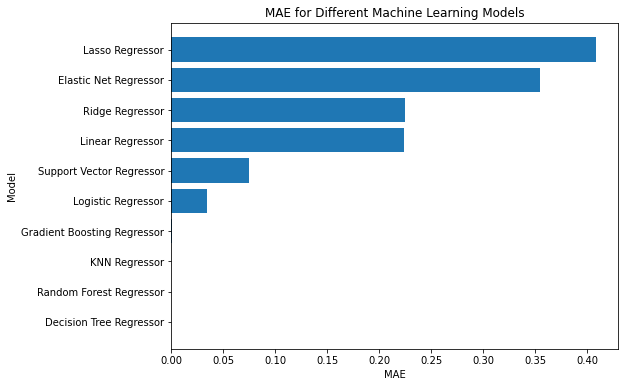

In [775]:
plt.figure(figsize=(8, 6))
models = Best_Model['Model']
mae = Best_Model['MAE']
plt.barh(models, mae)
plt.xlabel('MAE')
plt.ylabel('Model')
plt.title('MAE for Different Machine Learning Models')
plt.show()

##### Bar plot to display the Mean Absolute Percentage Values of each Regression Model

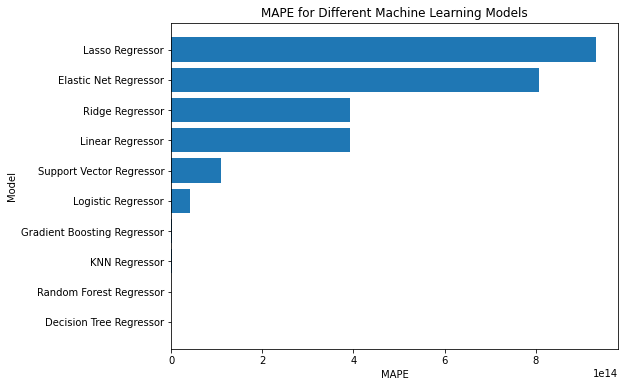

In [776]:
plt.figure(figsize=(8, 6))
models = Best_Model['Model']
mape = Best_Model['MAPE']
plt.barh(models, mape)
plt.xlabel('MAPE')
plt.ylabel('Model')
plt.title('MAPE for Different Machine Learning Models')
plt.show()

##### Bar plot to display the Root Mean Squared Values of each Regression Model

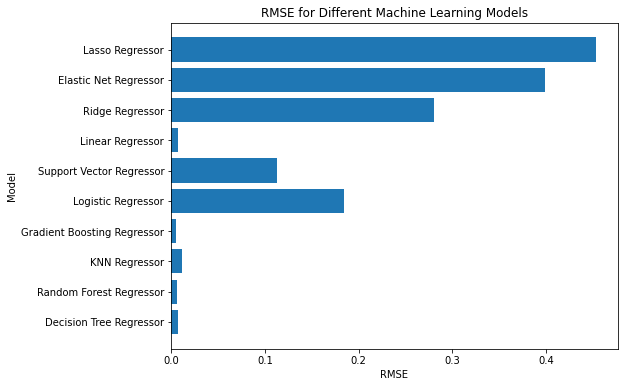

In [777]:
plt.figure(figsize=(8, 6))
models = Best_Model['Model']
rmse = Best_Model['RMSE']
plt.barh(models, rmse)
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('RMSE for Different Machine Learning Models')
plt.show()

#### Calibration Curve (Reliability Curves) 
The calibration curve is useful for evaluating the performance of different models and determining whether threshold value for choosing class label leads to model overfitting or underfitting. The points in various model lines that are above the dashed line have overfitted, while the points below the dashed line have underfitted. We need a model in which the majority of the points are along the dashed line.

In [778]:
pred_list = [preds_RF, preds_GBR, preds_SVR, preds_DT, preds_LR, preds_KNN, preds_Lasso,\
             preds_ridge, preds_Elastic, preds_logreg]
clf_names = ['RandomForestRegressor', 'GradientBoostingRegressor', 'SVR', 'DecisionTreeRegressor',\
             'Linear Regressor', 'KNN Regressor', 'Lasso Regressor', 'Ridge Regressor',\
             'ElasticNetRegressor', 'LogisticRegressor']

In [782]:
# Scaling the predicted probabilities to be between 0 and 1
scaler = MinMaxScaler()
pred_list_scaled = [scaler.fit_transform(np.reshape(pred, (-1,1))) for pred in pred_list]

for i, pred in enumerate(pred_list_scaled):
    print(f"{clf_names[i]}: min={pred.min()}, max={pred.max()}")

RandomForestRegressor: min=0.0, max=1.0
GradientBoostingRegressor: min=0.0, max=1.0
SVR: min=0.0, max=0.9999999999999999
DecisionTreeRegressor: min=0.0, max=1.0
Linear Regressor: min=0.0, max=0.9999999999999999
KNN Regressor: min=0.0, max=1.0
Lasso Regressor: min=0.0, max=0.0
Ridge Regressor: min=0.0, max=0.9999999999999999
ElasticNetRegressor: min=0.0, max=1.0
LogisticRegressor: min=0.0, max=1.0


##### Computing Calibration Curve of each Model

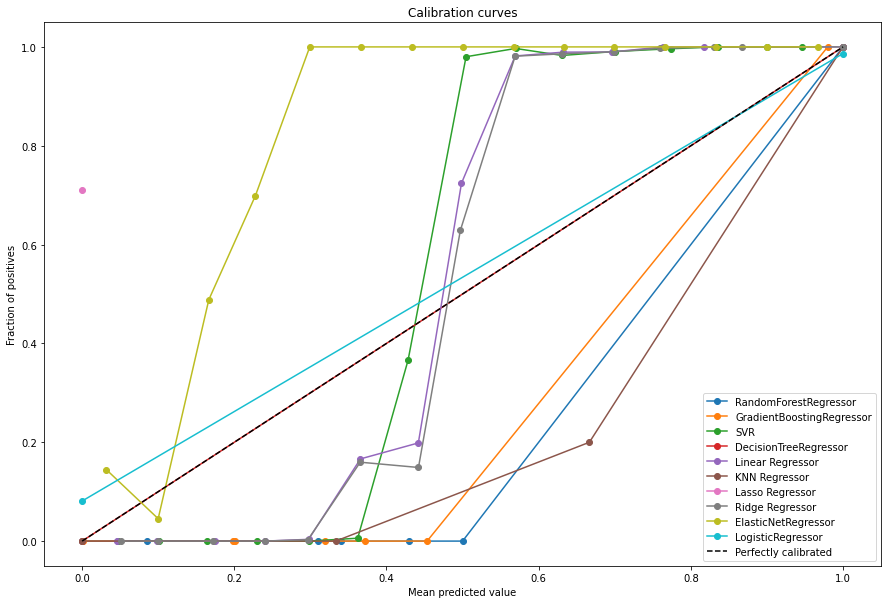

In [781]:
fig, ax = plt.subplots(figsize=(15,10))
for i, pred in enumerate(pred_list_scaled):
    frac_pos, mean_pred = calibration_curve(y_test, pred, n_bins=15)
    ax.plot(mean_pred, frac_pos, label=clf_names[i], marker='o')

# Add perfectly calibrated line
ax.plot([0, 1], [0, 1], linestyle='--', color='black', label='Perfectly calibrated')

# Set plot parameters
ax.set_xlabel('Mean predicted value')
ax.set_ylabel('Fraction of positives')
ax.set_ylim([-0.05, 1.05])
ax.legend()
ax.set_title('Calibration curves')

plt.show()

- From the plot of calibration curve above, it is observed that Decision Tree Regressor have points aligning with the perfectly calibrated dashed line. Moreover, Decision Tree Regressor has the least error compared with the other Models, which makes it the best performing model.